## Linear regression

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df_train = pd.read_csv("./linear_regression_data/train.csv")

In [4]:
df_train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
df_train.isnull().values.any()

True

In [6]:
df_test = pd.read_csv("./linear_regression_data/test.csv")

In [7]:
df_test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


#### Option 1 - pure Python

In [8]:
def cost(a0,a1,X,Y):
    J=0
    for i in range(len(X)):
        J+=(a0+a1*X[i]-Y[i])**2
    return (1/len(X))*J    

In [9]:
df_train=df_train.dropna().reset_index(drop=True)

In [10]:
df_train.isnull().values.any()

False

In [11]:
len(df_train)

699

In [12]:
cost(0,0,df_train["x"],df_train["y"])

3340.12482617867

In [13]:
def dcost_a0(a0,a1,X,Y):
    d0=0
    for i in range(len(X)):
        d0+=(a0+a1*X[i]-Y[i])  
    return (2/len(X))*d0    

In [14]:
dcost_a0(0 ,0,df_train["x"],df_train["y"])

-99.87973834091552

In [15]:
def dcost_a1(a0,a1,X,Y):
    d1=0
    for i in range(len(X)):
        d1+=(a0+a1*X[i]-Y[i])*X[i]
    return (2/len(X))*d1    

In [16]:
dcost_a1(0 ,0,df_train["x"],df_train["y"])

-6670.849169037078

In [17]:
def regression(a0,a1,X,Y,iter_=1500, learning_rate=0.0001):
    for i in range(iter_):
        J=cost(a0,a1,X,Y)
#         print(J)
        d0=dcost_a0(a0,a1,X,Y)
        d1=dcost_a1(a0,a1,X,Y)
        a0+=-learning_rate*d0
        a1+=-learning_rate*d1
    return a0,a1        

In [18]:
a0,a1=regression(0,0,df_train["x"],df_train["y"])

In [19]:
a0,a1

(0.006108317642737611, 0.9989578434684898)

In [20]:
from matplotlib import pyplot as plt

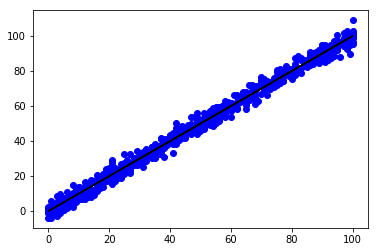

In [21]:
plt.scatter(df_train["x"],df_train["y"],color='b')
plt.plot(df_train['x'], a0+a1*df_train['x'],color='k')
# plt.legend(['More error'])
plt.show()

In [22]:
df_test=df_test.dropna().reset_index(drop=True)

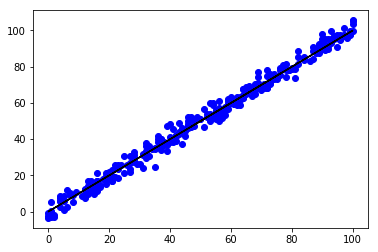

In [23]:
plt.scatter(df_test["x"],df_test["y"],color='b')
plt.plot(df_test['x'], a0+a1*df_test['x'],color='k')
# plt.legend(['More error'])
plt.show()

#### Option 2 - NumPy

In [24]:
def cost_2(a0,a1,X,Y):
    X=np.array(X).reshape(-1,1)
    Y=np.array(Y).reshape(-1,1)

    a0=np.full((len(X),1), a0) 
    a1=np.full((len(X),1), a1) 
    
    y = a0 + np.multiply(a1,X)
    error = y - Y
    mean_sq_er = np.sum(error**2)
        
    return (1/len(X))*mean_sq_er

In [25]:
cost_2(0,0,df_train["x"],df_train["y"])

3340.1248261786727

In [26]:
def dcost_a0_2(a0,a1,X,Y):
    X=np.array(X).reshape(-1,1)
    Y=np.array(Y).reshape(-1,1)
    a0=np.full((len(X),1), a0) 
    a1=np.full((len(X),1), a1) 
    y = a0 + np.multiply(a1,X)
    error = y - Y
    return (2/len(X))*np.sum(error) 

In [27]:
dcost_a0_2(0, 0,df_train["x"],df_train["y"])

-99.87973834091561

In [28]:
def dcost_a1_2(a0,a1,X,Y):
    X=np.array(X).reshape(-1,1)
    Y=np.array(Y).reshape(-1,1)
    a0=np.full((len(X),1), a0) 
    a1=np.full((len(X),1), a1) 
    y = a0 + np.multiply(a1,X)
    error = np.dot((y - Y).T,X)

    return (2/len(X))*np.sum(error)    

In [29]:
dcost_a1_2(0 ,0,df_train["x"],df_train["y"])

-6670.849169037075

In [30]:
def regression_2(a0,a1,X,Y,iter_=1500, learning_rate=0.0001):
    for i in range(iter_):
        J=cost_2(a0,a1,X,Y)
#         print(J)
        d0=dcost_a0_2(a0,a1,X,Y)
        d1=dcost_a1_2(a0,a1,X,Y)
        
        a0+=-learning_rate*d0
        a1+=-learning_rate*d1
        
    return a0,a1 

In [31]:
a0,a1=regression_2(0,0,df_train["x"],df_train["y"])

In [32]:
a0,a1

(0.006108317642737613, 0.9989578434684898)

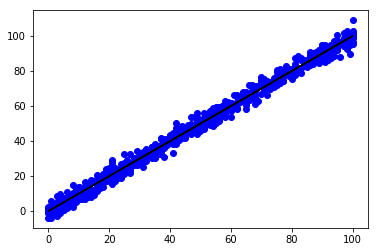

In [33]:
plt.scatter(df_train["x"],df_train["y"],color='b')
plt.plot(df_train['x'], a0+a1*df_train['x'],color='k')
# plt.legend(['More error'])
plt.show()

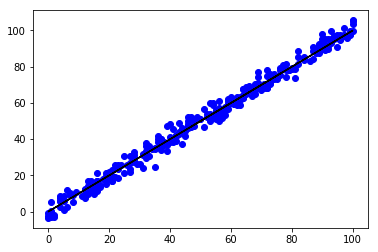

In [34]:
plt.scatter(df_test["x"],df_test["y"],color='b')
plt.plot(df_test['x'], a0+a1*df_test['x'],color='k')
# plt.legend(['More error'])
plt.show()

## Logistic regression

In [85]:
from sklearn.datasets.samples_generator import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=4)

In [86]:
# from sklearn import datasets
import math

In [87]:
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
# y = iris.target

Text(0,0.5,'Sepal width')

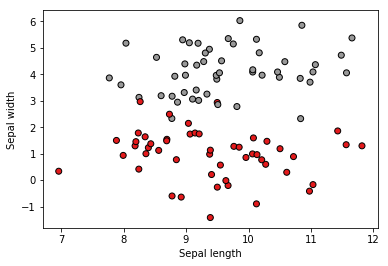

In [88]:
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [89]:
len(X),len(y)

(100, 100)

#### Option 1 - pure Python

In [90]:
def sigma(z):
    return 1/(1+math.exp(-z))

In [308]:
def cost_l(a0,a1,a2,X,Y):
    J=0    
    for i in range(len(X)):
        z=a0+a1*X[i][0]+a2*X[i][1]
#         print(z)
        h=sigma(z)
#         print(h)
#         print(Y[i]*math.log(h)+(1-Y[i])*math.log(1-h))
        J+=(Y[i]*math.log(h)+(1-Y[i])*math.log(1-h))
    
    return -(1/len(X))*J  

In [115]:
cost_l(0,1,4,X,y)

6.644893475351032

In [324]:
def dcost_a0_l(a0,a1,a2,X,Y):
    d0=0
    for i in range(len(X)):
        z=a0+a1*X[i][0]+a2*X[i][1]
       
        h=sigma(z)
        d0+=(h-Y[i]) 
    return (1/len(X))*d0   

In [94]:
dcost_a0_l(0,0,0,X,y)

0.0

In [95]:
def dcost_a1_l(a0,a1,a2,X,Y):
    d0=0
    for i in range(len(X)):
        z=a0+a1*X[i][0]+a2*X[i][1]
        h=sigma(z)
        d0+=(h-Y[i])*X[i][0] 
    return (1/len(X))*d0   

In [96]:
dcost_a1_l(0,0,0,X,y)

-0.05818036848740131

In [97]:
def dcost_a2_l(a0,a1,a2,X,Y):
    d0=0
    for i in range(len(X)):
        z=a0+a1*X[i][0]+a2*X[i][1]
        h=sigma(z)
        d0+=(h-Y[i])*X[i][1] 
    return (1/len(X))*d0 

In [98]:
dcost_a2_l(0,0,0,X,y)

-0.7882588075145236

In [99]:
def logistic_regression(a0,a1,a2, X,Y,iter_=1500, learning_rate=0.001):
    for i in range(iter_):
        J=cost_l(a0,a1,a2,X,Y)
#         print(J)
        d0=dcost_a0_l(a0,a1,a2,X,Y)
        d1=dcost_a1_l(a0,a1,a2,X,Y)
        d2=dcost_a2_l(a0,a1,a2,X,Y)
        a0+=-learning_rate*d0
        a1+=-learning_rate*d1
        a2+=-learning_rate*d2
    return a0,a1,a2    

In [100]:
a0,a1,a2=logistic_regression(0,0,0,X,y)

In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
from sklearn.metrics import f1_score

In [103]:
def predict(a0,a1,a2,X):
    result=[]
    for i in range(len(X)):
        z=a0+a1*X[i][0]+a2*X[i][1]
        h=sigma(z)
        if h>0.5:
            result.append(1)
        else:
            result.append(0)
            
    return result        

In [104]:
y_pred=predict(a0,a1,a2,X)

In [105]:
confusion_matrix(y,y_pred)

array([[47,  3],
       [ 1, 49]])

In [106]:
f1_score(y,y_pred)

0.9607843137254902

#### Option 2 - NumPy

In [109]:
import random

In [274]:
def sigma_2(z):
    result=1./(1.+np.exp(-z))
    return result

In [310]:
def cost_l_2(X,Y,A=[random.uniform(0, 1) for x in range(X.shape[1]+1)]):  
    X_with_bias=np.insert(X, 0, values=1, axis=1)   
    z=np.dot(X_with_bias,np.array(A).reshape(X_with_bias.shape[1],1))
    h = sigma_2(z)
    Y=Y.reshape(len(Y),1)  
    J=np.sum(np.add(np.multiply(Y,np.log(h)),np.multiply(1.-Y,np.log(1.-h))))
    return -(1/len(X))*J  

In [311]:
cost_l_2(X,y,A=[1,1,1])

5.68629234585748

In [388]:
def dcost_a0_l_2(X,Y,A=[random.uniform(0, 1) for x in range(X.shape[1]+1)]):
    X_with_bias=np.insert(X, 0, values=1, axis=1)   
    z=np.dot(X_with_bias,np.array(A).reshape(X_with_bias.shape[1],1))
    h = sigma_2(z)
    Y=Y.reshape(len(Y),1)  
    d0=np.sum(h-Y) 
    return (1/len(X))*d0  

In [389]:
dcost_a0_l_2(X,y,A=[6,2,3])

0.4999999999708966

In [405]:
def dcost_a1_l_2(X,Y,A=[random.uniform(0, 1) for x in range(X.shape[1]+1)]):
    X_with_bias=np.insert(X, 0, values=1, axis=1)   
    z=np.dot(X_with_bias,np.array(A).reshape(X_with_bias.shape[1],1))
    h = sigma_2(z)
    Y=Y.reshape(len(Y),1)  
 
    d0=np.sum(np.multiply(h-Y,X_with_bias[:,1].reshape(len(X_with_bias),1)))
    return (1/len(X))*d0   

In [406]:
dcost_a1_l_2(X,y,A=[1,2,1])

4.700172535615928

In [407]:
def dcost_a2_l_2(X,Y,A=[random.uniform(0, 1) for x in range(X.shape[1]+1)]):
    X_with_bias=np.insert(X, 0, values=1, axis=1)   
    z=np.dot(X_with_bias,np.array(A).reshape(X_with_bias.shape[1],1))
    h = sigma_2(z)
    Y=Y.reshape(len(Y),1)  
 
    d0=np.sum(np.multiply(h-Y,X_with_bias[:,2].reshape(len(X_with_bias),1)))
    return (1/len(X))*d0   

In [412]:
dcost_a2_l_2(X,y,A=[1,2,5])

0.4861068117451332

In [415]:
def logistic_regression_2(X,Y,A=[random.uniform(0, 1) for x in range(X.shape[1]+1)],
                          iter_=1500, learning_rate=0.001):
    for i in range(iter_):
        J=cost_l_2(X,Y,A)
#         print(J)
        d0=dcost_a0_l_2(X,Y,A)
        d1=dcost_a1_l_2(X,Y,A)
        d2=dcost_a2_l_2(X,Y,A)
        A[0]+=-learning_rate*d0
        A[1]+=-learning_rate*d1
        A[2]+=-learning_rate*d2
    return A[0],A[1],A[2]  

In [423]:
a0,a1,a2=logistic_regression_2(X,y)

In [424]:
y_pred=predict(a0,a1,a2,X)

In [425]:
confusion_matrix(y,y_pred)

array([[47,  3],
       [ 1, 49]])

In [426]:
f1_score(y,y_pred)

0.9607843137254902